### 数据加载与探索

特征名称: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
样本数: 150 特征数: 4
真实标签分布:
 0    50
1    50
2    50
Name: count, dtype: int64


D:\anaconda\envs\rurie\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 40482 (\N{CJK UNIFIED IDEOGRAPH-9E22}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\envs\rurie\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23614 (\N{CJK UNIFIED IDEOGRAPH-5C3E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\envs\rurie\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 33457 (\N{CJK UNIFIED IDEOGRAPH-82B1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\envs\rurie\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\envs\rurie\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25454 (\N{CJK UNIFIED IDEOGRAPH-636E}) missing from font(s) DejaVu Sans.
  fig.c

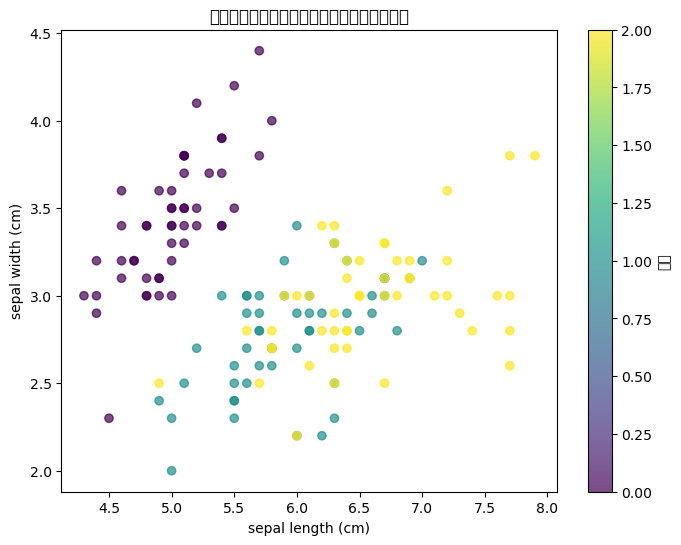

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# 加载数据集
data = load_iris()
X = data.data
y = data.target

# 查看数据基本信息
print("特征名称:", data.feature_names)
print("样本数:", X.shape[0], "特征数:", X.shape[1])
print("真实标签分布:\n", pd.Series(y).value_counts())

# 可视化前两个特征分布
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title("鸢尾花数据集前两个特征的分布（真实标签）")
plt.colorbar(label="类别")
plt.show()


### 数据预处理

C:\Users\swxdq\AppData\Local\Temp\ipykernel_15364\808070214.py:14: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\swxdq\AppData\Local\Temp\ipykernel_15364\808070214.py:14: UserWarning: Glyph 20934 (\N{CJK UNIFIED IDEOGRAPH-51C6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\swxdq\AppData\Local\Temp\ipykernel_15364\808070214.py:14: UserWarning: Glyph 21270 (\N{CJK UNIFIED IDEOGRAPH-5316}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\swxdq\AppData\Local\Temp\ipykernel_15364\808070214.py:14: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\swxdq\AppData\Local\Temp\ipykernel_15364\808070214.py:14: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\swxdq\AppData\Local\Temp\ipykernel_15364\808070214.py:14: UserWarning: Glyph 29305 (\N{CJK 

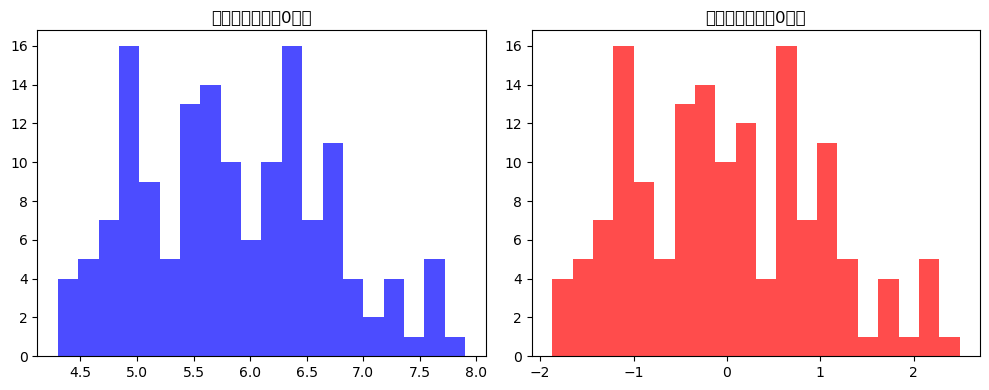

In [6]:
from sklearn.preprocessing import StandardScaler
# 标准化特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 对比标准化前后的特征分布
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(X[:, 0], bins=20, color='blue', alpha=0.7)
plt.title("标准化前的特征0分布")
plt.subplot(1, 2, 2)
plt.hist(X_scaled[:, 0], bins=20, color='red', alpha=0.7)
plt.title("标准化后的特征0分布")
plt.tight_layout()
plt.show()

### 手动实现层次分类

D:\anaconda\envs\rurie\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36317 (\N{CJK UNIFIED IDEOGRAPH-8DDD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\envs\rurie\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 31163 (\N{CJK UNIFIED IDEOGRAPH-79BB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\envs\rurie\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23618 (\N{CJK UNIFIED IDEOGRAPH-5C42}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\envs\rurie\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\envs\rurie\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32858 (\N{CJK UNIFIED IDEOGRAPH-805A}) missing from font(s) DejaVu Sans.
  fig.c

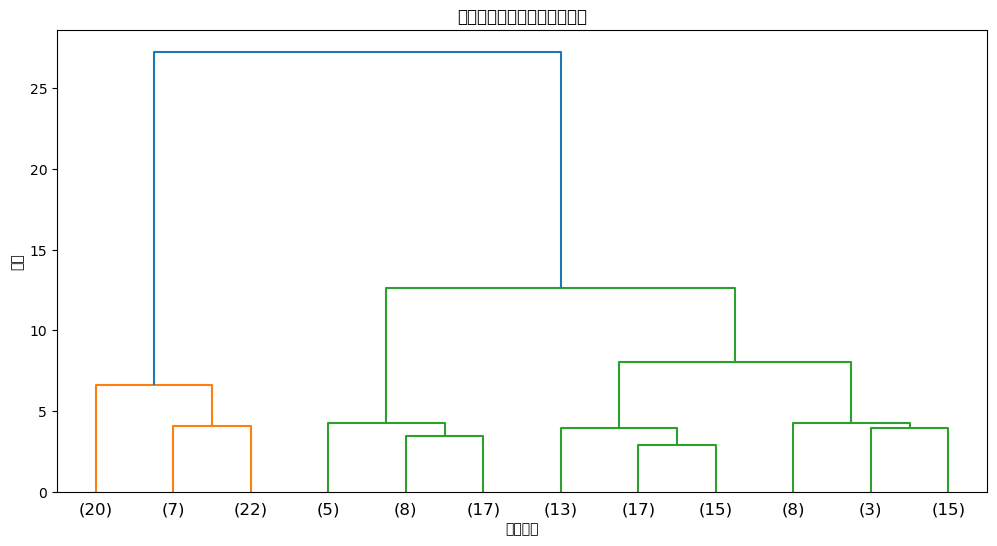

In [7]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

# 计算距离矩阵
distance_matrix = pdist(X_scaled, metric='euclidean') # 计算X_scaled所有点两两之间的欧几里得距离，返回的是压缩距离矩阵（一维数组）

# 层次聚类（使用ward方法）
linkage_matrix = linkage(distance_matrix, method='ward') # 用于计算层次聚类的合并过程 

# 绘制树状图
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='lastp', p=12, show_leaf_counts=True) # 用于可视化聚类树
plt.title("层次聚类树状图（手动实现）")
plt.xlabel("样本索引")
plt.ylabel("距离")
plt.show()

# 根据树状图选择聚类数（如三类）
from scipy.cluster.hierarchy import fcluster
y_pred_manual = fcluster(linkage_matrix, t=3, criterion='maxclust') - 1  # 转换为0-based标签

### sklearn实现

C:\Users\swxdq\AppData\Local\Temp\ipykernel_15364\920943128.py:15: UserWarning: Glyph 25163 (\N{CJK UNIFIED IDEOGRAPH-624B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\swxdq\AppData\Local\Temp\ipykernel_15364\920943128.py:15: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\swxdq\AppData\Local\Temp\ipykernel_15364\920943128.py:15: UserWarning: Glyph 23454 (\N{CJK UNIFIED IDEOGRAPH-5B9E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\swxdq\AppData\Local\Temp\ipykernel_15364\920943128.py:15: UserWarning: Glyph 29616 (\N{CJK UNIFIED IDEOGRAPH-73B0}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\swxdq\AppData\Local\Temp\ipykernel_15364\920943128.py:15: UserWarning: Glyph 23618 (\N{CJK UNIFIED IDEOGRAPH-5C42}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\swxdq\AppData\Local\Temp\ipykernel_15364\920943128.py:15: UserWarning: Glyph 27425 (\N{CJK 

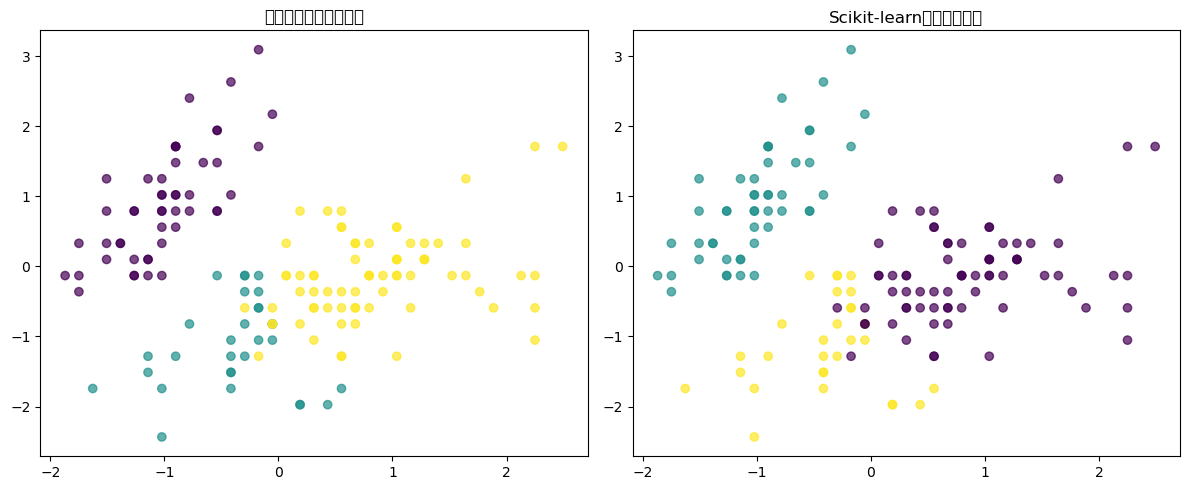

In [10]:
from sklearn.cluster import AgglomerativeClustering

# 创建并训练模型
sklearn_hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_pred_sklearn = sklearn_hc.fit_predict(X_scaled)

# 可视化聚类结果
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred_manual, cmap='viridis', alpha=0.7)
plt.title("手动实现层次聚类结果")
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred_sklearn, cmap='viridis', alpha=0.7)
plt.title("Scikit-learn层次聚类结果")
plt.tight_layout()
plt.show()

### 模型评估与对比

In [11]:
from sklearn.metrics import silhouette_score

# 计算轮廓系数（评估聚类效果）
silhouette_manual = silhouette_score(X_scaled, y_pred_manual)
silhouette_sklearn = silhouette_score(X_scaled, y_pred_sklearn)

print("\n手动实现层次聚类的轮廓系数:", silhouette_manual)
print("Scikit-learn层次聚类的轮廓系数:", silhouette_sklearn)

# 对比聚类结果与真实标签
print("\n手动实现层次聚类 vs 真实标签:")
print(pd.crosstab(y, y_pred_manual, rownames=['真实标签'], colnames=['预测标签']))
print("\nScikit-learn层次聚类 vs 真实标签:")
print(pd.crosstab(y, y_pred_sklearn, rownames=['真实标签'], colnames=['预测标签']))


手动实现层次聚类的轮廓系数: 0.4466890410285909
Scikit-learn层次聚类的轮廓系数: 0.4466890410285909

手动实现层次聚类 vs 真实标签:
预测标签   0   1   2
真实标签            
0     49   1   0
1      0  27  23
2      0   2  48

Scikit-learn层次聚类 vs 真实标签:
预测标签   0   1   2
真实标签            
0      0  49   1
1     23   0  27
2     48   0   2
